In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from nltk import word_tokenize
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import resample
from sklearn.metrics import *
from sklearn import model_selection
import warnings
warnings.filterwarnings('ignore')
%pip install Sastrawi
import nltk
nltk.download('punkt')

     |████████████████████████████████| 209 kB 7.4 MB/s 
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
data=pd.read_csv('train.csv',sep=',', error_bad_lines = False)
# data = data.drop('label', axis=1)
data

,label,tweet
0,Negative,"Mending dari pada UN dihapus, anak- anak Di aj..."
1,Positive,Khawatir klo UN dihapuskan murid akan menyepel...
2,Positive,Apakah motivasi seorang murid belajar itu hany...
3,Positive,Penghapusan UN malah bikin para siswa/i hemat ...
4,Neutral,Apakah yg tidak setuju UN ditiadakan dengan al...
...,...,...
895,Positive,@lix_lee007 Hi koh ✨\n\nMeskipun aku tau pasti...
896,Neutral,@subtanyarl Enaknya ngapain yaa kalo aku sih c...
897,Positive,"jadi kan d-5 mau ujian osce nasional, trs d-14..."
898,Positive,@bukanomik Ujian kehidupan :(\n\nUJIAN KOMPETE...


In [3]:
data1=pd.read_csv('10test.csv',sep=',', error_bad_lines = False)
# data = data.drop('label', axis=1)
data1

,label,tweet
0,NaN,"un, tidak boleh dihapus.\n\nkualitas siswa din..."
1,NaN,Terserah deh terserah. Udah capek ngikutin pol...
2,NaN,Faber cstle cs rugi dah kalo gini.
3,NaN,Tidak setuju.. UN merupakan hasil final siswa ...
4,NaN,UN adalah kotoran
...,...,...
95,NaN,"Percetakan lembar soal UN BANGKRUT, hilang ord..."
96,NaN,buat apa ujian kalo wali kelas tetep kasih kun...
97,NaN,"Sekolah / kuliah tanpa perploncoan, tanpa un, ..."
98,NaN,Generasi milenial sekarang adalah produk dari ...


# CLEANSING

In [4]:
cleansing=[]
for x in data['tweet']:
    temporary=word_tokenize(str(x))
    temporary=[word for word in temporary if word.isalpha()]
    cleansing.append(temporary)

In [5]:
cleansing

[['Mending',
  'dari',
  'pada',
  'UN',
  'dihapus',
  'anak',
  'Di',
  'ajarin',
  'saling',
  'toleransi',
  'dan',
  'belajar',
  'sesuai',
  'hobby',
  'mereka'],
 ['Khawatir',
  'klo',
  'UN',
  'dihapuskan',
  'murid',
  'akan',
  'menyepelekan',
  'proses',
  'pembelajaran',
  'Toh',
  'gak',
  'ada',
  'UN',
  'pasti',
  'lulus',
  'lah'],
 ['Apakah',
  'motivasi',
  'seorang',
  'murid',
  'belajar',
  'itu',
  'hanya',
  'untuk',
  'lulus',
  'Buat',
  'saya',
  'lebih',
  'baik',
  'seperti',
  'di',
  'KorSel',
  'berat',
  'pressure',
  'ujiannya',
  'tapi',
  'motivasi',
  'belajarnya',
  'supaya',
  'bisa',
  'masuk',
  'univ',
  'unggulan',
  'Jadi',
  'anak',
  'diajarkan',
  'set',
  'his',
  'or',
  'her',
  'own',
  'goal',
  'Apa',
  'yg',
  'kamu',
  'tabur',
  'itu',
  'yg',
  'kau',
  'tuai'],
 ['Penghapusan',
  'UN',
  'malah',
  'bikin',
  'para',
  'hemat',
  'uang',
  'Pak',
  'agar',
  'tidak',
  'beli',
  'kunci',
  'Wajah',
  'menyeringai'],
 ['Apakah',

In [6]:
cleansing1=[]
for x in data1['tweet']:
    temporary=word_tokenize(str(x))
    temporary=[word for word in temporary if word.isalpha()]
    cleansing1.append(temporary)

In [7]:
cleansing1

[['un',
  'tidak',
  'boleh',
  'dihapus',
  'kualitas',
  'siswa',
  'dinilai',
  'dari',
  'ujian',
  'akademis',
  'dan',
  'pengajarnya',
  'tidak',
  'ada',
  'siswa',
  'yang',
  'bodoh',
  'kalau',
  'pengajarnya',
  'menarik',
  'dalam',
  'mengajar',
  'karakter',
  'yg',
  'baik',
  'bisa',
  'terbentuk',
  'dari',
  'pengajarnya',
  'juga',
  'apa',
  'ada',
  'nilai',
  'baku',
  'dalam',
  'karakter'],
 ['Terserah',
  'deh',
  'terserah',
  'Udah',
  'capek',
  'ngikutin',
  'polemik',
  'sistem',
  'pendidikan',
  'di',
  'negeri',
  'ini'],
 ['Faber', 'cstle', 'cs', 'rugi', 'dah', 'kalo', 'gini'],
 ['Tidak',
  'UN',
  'merupakan',
  'hasil',
  'final',
  'siswa',
  'lolos',
  'ketahap',
  'lanjutnya',
  'Memantaskan',
  'diri',
  'untuk',
  'bisa',
  'naik',
  'ke',
  'level'],
 ['UN', 'adalah', 'kotoran'],
 ['Kasih',
  'tau',
  'pak',
  'JK',
  'tolong',
  'dia',
  'adalah',
  'salah',
  'satu',
  'generasi',
  'yang',
  'tidak',
  'merasakan',
  'UN',
  'apakah',
  'di

# TOKENIZATION

In [8]:
def tokenizerr(x):
    return x.split(' ')

In [9]:
tokeneddata=[]
for i,x in enumerate(cleansing):
    tokeneddata.append(" ".join(map(str, x)))
tfidf= TfidfVectorizer(tokenizer=tokenizerr,use_idf=True, smooth_idf=True, sublinear_tf=False)
tfidf.fit_transform([tokeneddata[0]])
print(tfidf.get_feature_names())


['ajarin', 'anak', 'belajar', 'dan', 'dari', 'di', 'dihapus', 'hobby', 'mending', 'mereka', 'pada', 'saling', 'sesuai', 'toleransi', 'un']


In [10]:
tokeneddata1=[]
for i,x in enumerate(cleansing1):
    tokeneddata1.append(" ".join(map(str, x)))
tfidf= TfidfVectorizer(tokenizer=tokenizerr,use_idf=True, smooth_idf=True, sublinear_tf=False)
tfidf.fit_transform([tokeneddata1[0]])
print(tfidf.get_feature_names())

['ada', 'akademis', 'apa', 'baik', 'baku', 'bisa', 'bodoh', 'boleh', 'dalam', 'dan', 'dari', 'dihapus', 'dinilai', 'juga', 'kalau', 'karakter', 'kualitas', 'menarik', 'mengajar', 'nilai', 'pengajarnya', 'siswa', 'terbentuk', 'tidak', 'ujian', 'un', 'yang', 'yg']


In [11]:
new_data = pd.DataFrame()
new_data['tweet']=pd.Series(tokeneddata)
new_data['Label']=data['label']

In [12]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   900 non-null    object
 1   Label   900 non-null    object
dtypes: object(2)
memory usage: 14.2+ KB


In [13]:
new_data1 = pd.DataFrame()
new_data1['tweet']=pd.Series(tokeneddata1)
new_data1['Label']=data1['label']

In [14]:
new_data['Label'].value_counts()

Positive    548
Negative    203
Neutral     149
Name: Label, dtype: int64

In [15]:
new_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tweet   100 non-null    object 
 1   Label   0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


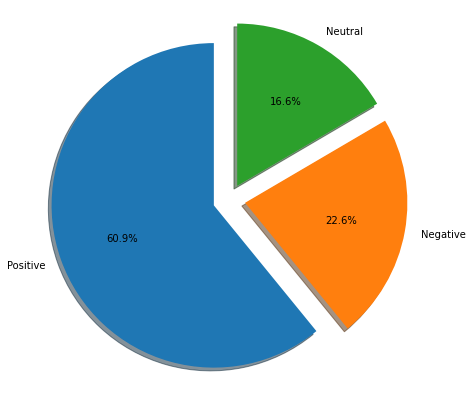

In [16]:
import matplotlib.pyplot as plt
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
Labels = 'Positive', 'Negative', 'Neutral'
sizes = [new_data[new_data.Label=='Positive'].shape[0], new_data[new_data.Label=='Negative'].shape[0],
         new_data[new_data.Label=='Neutral'].shape[0]]
explode = (0.1, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes, explode=explode, labels=Labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [17]:

df_upsampled = pd.DataFrame()
df_upsampled['Label'] = new_data['Label']
df_upsampled['tweet'] = new_data['tweet']

In [18]:
df_upsampled1 = pd.DataFrame()

df_upsampled1['tweet'] = new_data1['tweet']

In [19]:
df_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   900 non-null    object
 1   tweet   900 non-null    object
dtypes: object(2)
memory usage: 14.2+ KB


# CASE FOLDING

In [20]:
df_upsampled['tweet'] = df_upsampled['tweet'].str.lower()
df_upsampled['tweet'].head()

0    mending dari pada un dihapus anak di ajarin sa...
1    khawatir klo un dihapuskan murid akan menyepel...
2    apakah motivasi seorang murid belajar itu hany...
3    penghapusan un malah bikin para hemat uang pak...
4    apakah yg tidak setuju un ditiadakan dengan al...
Name: tweet, dtype: object

In [21]:
df_upsampled1['tweet'] = df_upsampled1['tweet'].str.lower()
df_upsampled1['tweet'].head()

0    un tidak boleh dihapus kualitas siswa dinilai ...
1    terserah deh terserah udah capek ngikutin pole...
2                    faber cstle cs rugi dah kalo gini
3    tidak un merupakan hasil final siswa lolos ket...
4                                    un adalah kotoran
Name: tweet, dtype: object

# STEMMING and STOPWORD

In [22]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()


words = []
for i, kalimat in enumerate (df_upsampled['tweet']):
    stop = stemmer.stem(kalimat)
    words.append(stop)

new = pd.DataFrame()
new['ulasan']=pd.Series(words)

replace_set = {'maka', 'yang', 'dengan', 'atau', 'akan', 'kepada', 'sebagai', 'oleh', 'dan'}

new['ulasan'] = new['ulasan'].str.split(' ').apply(lambda x: ' '.join(k for k in x if k not in replace_set))

df_upsampled['tweet'] = new['ulasan']
df_upsampled['tweet'].head()

0    mending dari pada un hapus anak di ajarin sali...
1    khawatir klo un hapus murid sepele proses ajar...
2    apakah motivasi orang murid ajar itu hanya unt...
3    hapus un malah bikin para hemat uang pak agar ...
4    apakah yg tidak tuju un tiada alas nanti siswa...
Name: tweet, dtype: object

In [23]:
df_upsampled1['tweet'] = new['ulasan']
df_upsampled1['tweet'].head()

0    mending dari pada un hapus anak di ajarin sali...
1    khawatir klo un hapus murid sepele proses ajar...
2    apakah motivasi orang murid ajar itu hanya unt...
3    hapus un malah bikin para hemat uang pak agar ...
4    apakah yg tidak tuju un tiada alas nanti siswa...
Name: tweet, dtype: object

In [24]:
df_upsampled['tweet'][4]

'apakah yg tidak tuju un tiada alas nanti siswa malas tidak pernah lihat didik negara maju'

In [25]:
df_upsampled1['tweet'][4]

'apakah yg tidak tuju un tiada alas nanti siswa malas tidak pernah lihat didik negara maju'

# Resample

In [26]:
from sklearn.utils import resample

df_majority = new_data[new_data.Label=='Positive']
df_minority1 = new_data[new_data.Label=='Negative']
df_minority2 = new_data[new_data.Label=='Neutral']

df_minority_upsampled1 = resample(df_minority1, 
                                 replace=True,    
                                 n_samples=new_data[new_data.Label =='Positive'].shape[0],    
                                 random_state=123) 
df_minority_upsampled2 = resample(df_minority2, 
                                 replace=True,    
                                 n_samples=new_data[new_data.Label =='Positive'].shape[0],    
                                 random_state=123) 
df_upsampled = pd.concat([df_majority, df_minority_upsampled1, df_minority_upsampled2])

In [27]:
df_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1644 entries, 1 to 543
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   1644 non-null   object
 1   Label   1644 non-null   object
dtypes: object(2)
memory usage: 38.5+ KB


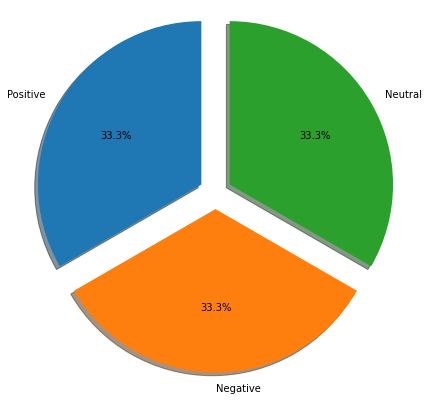

In [28]:
import matplotlib.pyplot as plt
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
Labels = 'Positive', 'Negative', 'Neutral'
sizes = [df_upsampled[df_upsampled.Label=='Positive'].shape[0], df_upsampled[df_upsampled.Label=='Negative'].shape[0],
         df_upsampled[df_upsampled.Label=='Neutral'].shape[0]]
explode = (0.1, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes, explode=explode, labels=Labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

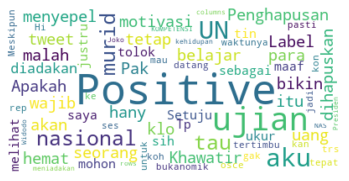

In [29]:
from wordcloud import WordCloud
text = df_upsampled.loc[df_upsampled['Label'] == 'Positive']
wordcloud = WordCloud(max_font_size=50, 
max_words=200, background_color="white").generate(str(text))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

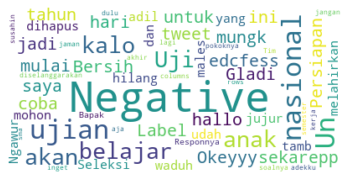

In [30]:
from wordcloud import WordCloud
text = df_upsampled.loc[df_upsampled['Label'] == 'Negative']
wordcloud = WordCloud(max_font_size=50, 
max_words=200, background_color="white").generate(str(text))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

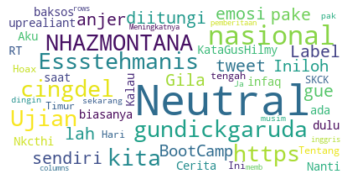

In [31]:
from wordcloud import WordCloud
text = df_upsampled.loc[df_upsampled['Label'] == 'Neutral']
wordcloud = WordCloud(max_font_size=50, 
max_words=200, background_color="white").generate(str(text))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [32]:
X = df_upsampled['tweet'].values
y = df_upsampled['Label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [33]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

# TF-IDF Vectorizer

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_transformer = TfidfVectorizer()
tf_transformer.fit(X_train)
X_train_tf = tf_transformer.transform(X_train)
X_test  = tf_transformer.transform(X_test)
X_train_tf.shape

(1479, 3482)

In [35]:
feature_names = tf_transformer.get_feature_names()
dense = X_test.todense()
denselist = dense.tolist()
pd.DataFrame(denselist, columns=feature_names).head(10)

,aakhirnya,aalahhhh,aamiin,aamiini,abad,abim,abis,abisnya,abiz,about,absen,abu,academy,acara,acuan,ada,adadikompas,adakan,adalah,adanya,ade,adek,adekku,adil,adl,adsprdy,aduh,adyabadya,ae,afrifaldyy,afryanardiansy,after,agama,agar,agenda,agus,ah,ahli,aishakinaaa,aj,...,yalah,yalord,yam,yang,yatim,yaudah,ye,yea,yeahmahasiswa,year,years,yeee,yeenayc,yet,yg,yha,ynrtmldiah,yogyakarta,yok,yokozka,you,your,youtube,yujurlahpadaqu,yuk,yuniati,yup,yupi,yusuf,yuup,ywdh,zaman,zeniuseducation,zetyaraveninda,zeyeng,zonasi,zsech,zuckerberg,ㅠㅠ,ㅤㅤ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.086244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.140625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.726196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.079693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.068494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.225432,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.193753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
X_train_tf.shape, X_test.shape, y_train.shape, y_test.shape

((1479, 3482), (165, 3482), (1479,), (165,))

In [37]:
print(X_test)

  (0, 3278)	0.09462921574423393
  (0, 2848)	0.38487753798775676
  (0, 2687)	0.4266982229933786
  (0, 2111)	0.10217014998326032
  (0, 1748)	0.40803115564360515
  (0, 833)	0.4918917844663342
  (0, 95)	0.4918917844663342
  (1, 3321)	0.15607999200703424
  (1, 3278)	0.06536471196543837
  (1, 3182)	0.17261630786400936
  (1, 3176)	0.2999179730233373
  (1, 2902)	0.339772073105938
  (1, 2901)	0.2999179730233373
  (1, 2748)	0.2900557804195039
  (1, 2651)	0.15492355859263413
  (1, 2506)	0.2999179730233373
  (1, 2063)	0.2999179730233373
  (1, 1833)	0.27820359319511995
  (1, 1164)	0.10458776838622458
  (1, 484)	0.2999179730233373
  (1, 370)	0.2999179730233373
  (1, 133)	0.2999179730233373
  (2, 3433)	0.10666667837383353
  (2, 3382)	0.17874184729770168
  (2, 3337)	0.21385931311349707
  :	:
  (164, 2111)	0.03333813629795865
  (164, 1848)	0.14751228885943832
  (164, 1647)	0.16050436802795667
  (164, 1591)	0.16718321508916267
  (164, 1349)	0.16718321508916267
  (164, 1267)	0.08273276106636542
  (164, 1

In [38]:
datates = [i for i in df_upsampled1['tweet'].values.astype('U')]

In [57]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier (n_estimators=100, random_state=0)
model.fit(X_train_tf, y_train)
predict = model.predict(X_test)
pred = model.predict((vectorizer.transform(datates).todense()))

In [58]:
pred
pre = pred.tolist()

In [59]:
pred

array(['Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Negative', 'Negative', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Negative', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Neutral', 'Positive', 'Neutral',
       'Positive', 'Positive', 'Negative', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Negative', 'Neutral', 'Positive',
       'Positive', 'Positive', 'Positive', 'Negative', 'Positive',
       'Positive', 'Positive', 'Positive', 'Negative', 'Positive',
       'Positive', 'Positive', 'Neutral', 'Negative', 'Positive',
       'Negative', 'Positive', 'Positive', 'Positive', 'Negative',

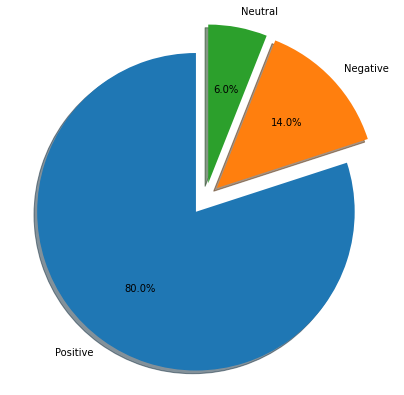

In [60]:
import matplotlib.pyplot as plt
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Positive', 'Negative', 'Neutral'
sizes = [pre.count('Positive'), pre.count('Negative'),
         pre.count('Neutral')]
explode = (0.1, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [61]:
print(classification_report(y_test, predict))
print('\n')
cm = confusion_matrix(y_test, predict)
print(cm)
print('\n')
print('Accuracy Score: ', accuracy_score(y_test, predict))

              precision    recall  f1-score   support

    Negative       0.94      0.94      0.94        51
     Neutral       0.95      0.98      0.96        55
    Positive       0.93      0.90      0.91        59

    accuracy                           0.94       165
   macro avg       0.94      0.94      0.94       165
weighted avg       0.94      0.94      0.94       165



[[48  0  3]
 [ 0 54  1]
 [ 3  3 53]]


Accuracy Score:  0.9393939393939394


In [62]:
model.score(X_train_tf.toarray(),y_train)

0.9979716024340771

In [63]:
model.score(X_test,y_test)

0.9393939393939394

In [49]:
sent = pd.DataFrame({'Sentiment':pred, 'tweet':datates})

In [50]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

sent

,Sentiment,tweet
0,Positive,mending dari pada un hapus anak di ajarin sali...
1,Positive,khawatir klo un hapus murid sepele proses ajar...
2,Positive,apakah motivasi orang murid ajar itu hanya unt...
3,Positive,hapus un malah bikin para hemat uang pak agar ...
4,Positive,apakah yg tidak tuju un tiada alas nanti siswa...
5,Negative,misal un di hapus apa pas sbmptn mereka nggak ...
6,Negative,kalau un hapus nanti alas buat putus apa ya ng...
7,Positive,un tetap wajib ada bagai tolok ukur tingkat ha...
8,Positive,tuju sih tp mohon maaf saya justru lihat takut...
9,Positive,dukung mas menteri nadiem dong pak mah udah ge...


In [ ]:
sent.to_excel('hasil.xlsx')